## IRMAK AYTEKIN - aytekini

Assignment 1: Measuring Distances with Cepheid Variables
==============================================

## Before you begin

Assuming you have loaded this file into your Jupyter Notebooks workspace, make sure to press the "play" button at the top of the page in each box. This will render the Markdown into nicely-formatted text.

Select <span style="color:purple"> **View -> Show Line Numbers** </span> from the menu at the top to the screen. This will make line numbers appear in each of the blocks of code below. For this assignment we have added specific instuctuions such as "Edit the parameter on Line 5" to make it clear what is required. Unfortunately, you will need to check this again everytime you open this workbook, or refresh the JupyterHub.

## Introduction

This Jupyter Notebook will serve as the template the third question on Assignment 1. You will be working through the content it contains and then filling in your own work in the spaces provided. In order to complete this assignment you will require the following (all of which will be provided to you):

* The file Gaia_cepheids_AST221.csv, which contains parallax, period, and brightness measurements for several hundred Cepheid variable stars that were observed by the Gaia satellite.
* Information on the brightness and period measured for a Cepheid variable in a distant galaxy. See the main assignment page on quercus for what you do.

In the sections below, every individual sub-questions have been written in <span style="color:red"> Red Text </span>. Some questions require you to make edits to bits of code that we have provided, in which case we specify the specific lines you are required to edit. Other questions are short answer (paragraph) format, asking you to summarize what you learned from various portions of the activity. In cases where paragraph-stype answers are required, we have indicated where you should enter your responses in <span style="color:blue"> Blue Text.</span>

Please reach out of you have any questions.

# Phase 1: Measuring the Period-Luminosity Relationship

In order to determine the distance to the star that you have been assigned, you first need to measure and calibrate a period-luminosity relationship. In phase 1 of this report you will use the information in the file Gaia_cepheids_AST301.csv to do just that.

#### <span style="color:red">QUESTION 3A:</span> Read in the Data File

A huge part of astronomy research involves reading in tables of data and performing basic manipulations on them. Here you will practice with a few of the basics.
* First, write a line of code in line 5 that will read in the data file 'Gaia_cepheids_AST221.csv' and then look at the result.
* Then uncomment lines 8, 9, and 10 below and write bits of code so that they will select the column of data from the table that contains the parallax, period, and magnitude information for the Cepheids. 

Note: we highly recommend looking at the Python tutorial notebook provided for reference here.

In [1]:
!pip install numpy pandas matplotlib
!pip install scipy


[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 7.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01

[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd

# Read in your CSV file
data = pd.read_csv("Gaia_cepheids_AST221.csv")

# Extract columns
parallax = data["parallax"].values   # mas
period = data["period"].values       # days
magnitude = data["mag"].values       # apparent magnitude


#### <span style="color:red">QUESTION 3B:</span> Calculate the parameters you need to measure a period-luminosity relationship.

In order to measure a period-luminosity relationship, you need a period and a luminosity. We have provided you with a period for all the stars in the data table. However, you now need to calculate the *absolute magnitudes* of all of the stars. To do this:

* First, uncomment line3 and write an equation that will calculate the distance to the stars based on the parallax.
* Second, uncomment line 6 and write an equation that will calculate the absolute magnitude of the stars based on their apparent magnitudes and distances

We highly recommend printing/looking at the numbers you calculated to make sure that they make sense. 

In [3]:
# Write an equation that calculates the distance to the stars from the parallax.
# Think! What units are the parallax values in?
distance = 1000.0 / parallax

#Write an equation that calculates the absolute magnitude based on the apparent magnitudes and distances
absolute_mag = magnitude - 5 * np.log10(distance / 10.0)


#### <span style="color:red">QUESTION 3C:</span> Plot the Period Luminosity Relationship

The code below will display a plot of your periods versus absolute magnitudes. You can run it as is. But then Modify it as follows:
* First, uncomment line 9. This sets the lower and upper bounds of the vertical axis. This is necessary to make sure that the bright magnitudes (which are "smaller" numbers) end up on top. You can change this range if necessary.
* Second, add a line of code to line 12 so that the periods (x-axis) are plotted on a logaritmic scale.
* Third, add code to lines 15 and 16 so that axis labels are printed. Make sure that they include units!


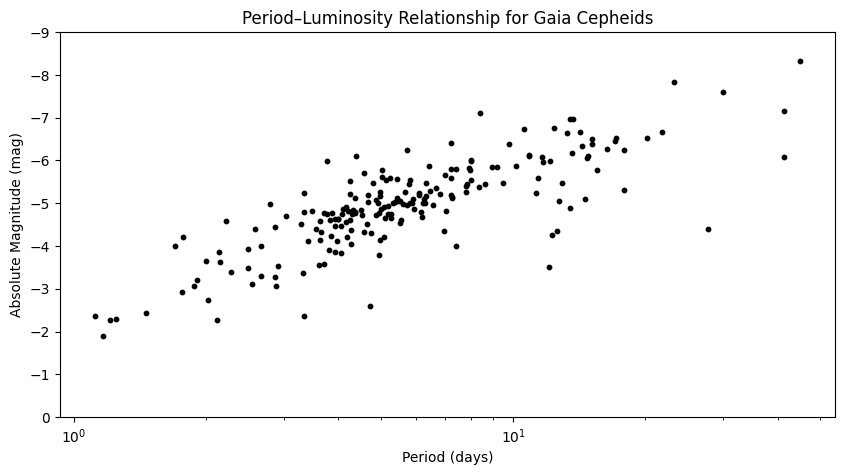

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,5))
plt.scatter(period, absolute_mag, s=10, color='black')

# Brighter mags on top
plt.ylim([0, -9])

# Period axis logarithmic
plt.xscale("log")

# Labels
plt.xlabel("Period (days)")
plt.ylabel("Absolute Magnitude (mag)")
plt.title("Period–Luminosity Relationship for Gaia Cepheids")
plt.show()


#### <span style="color:red">QUESTION 3D:</span> Fit the Period-Luminosity Relationship

As described in the assignment, the Cepheid period luminosity relationship can be described by a straight line if we use absolute magnitudes and the *logarithm of the periods*. Using the code from the python tutorial as a reference, we will now do this.

* First, uncomment and modify line 4 so that it will perform the linear fit between the log of the periods and the absolute magnitudes. Then run the code. It will print you best fit intersept and slope.
* Next, we want to overplot the best-fit line on the data. Start by copying your code from question 3C to plot the data again. (put it somewhere between lines 12 and 19)
* To overplot the line, uncomment line 21 and write an equation that will calcualte the value of the best-fit line for all of the periods in your dataset. 
* Then unncoment line 24 and run the code. If the your line doesn't go through the data points look back at either the equation you wrote in line 21 or the original linear fit you did back in line 4.

Slope = -2.994926385980864 ; Intercept = -2.6897153055472174


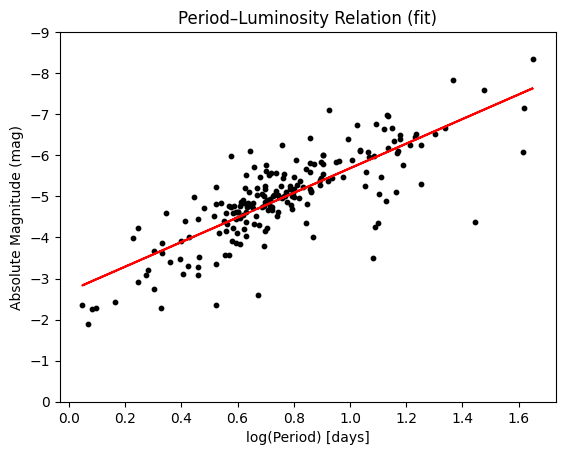

In [5]:
from scipy import stats

logP = np.log10(period)

fit = stats.linregress(logP, absolute_mag)
slope = fit.slope
intercept = fit.intercept

print("Slope =", slope, "; Intercept =", intercept)

# Fit line
mag_fit = slope * logP + intercept

# Plot data + line
plt.scatter(logP, absolute_mag, s=10, color='black')
plt.plot(logP, mag_fit, color='red')
plt.xlabel("log(Period) [days]")
plt.ylabel("Absolute Magnitude (mag)")
plt.title("Period–Luminosity Relation (fit)")
plt.ylim([0, -9])
plt.show()


# Phase 2: Determining the Distance to your Extragalactic Cepheid Star

You will now use your results from Phase 1, above, to calculate the distances to a Cepheid variable star that is located in a galaxy outside the Milky Way.

#### <span style="color:red">QUESTION 3E:</span> Modify the code below to calcualte the distance to your extragalactic Cepheid.

* First, enter the slope and intercept of the period luminosity relationship you measured in question 4a into lines 3 and 4.
* Second, enter the period and brightness for your assigned star (provided on quercus) in to lines 7 and 8. 
* Third, use the information here to calculate the absolute magnitude of your star based on the period luminosity relationship. Write your calculation in line 10.
* Fourth, use this absolute magnitude to calculate a distance to your star. Write your calculation in line 11 and print the result.
* In the text box below this question, write down your final result (make sure to list what units your final distance is in!) and put the distance you found in context. Is it similar to the closest galaxies to the Milky Way, the Virgo cluster, the size of the universe, etc.

In [6]:
# Insert your slope & intercept from fit
plr_slope = slope
plr_intercept = intercept

# Example extragalactic Cepheid values (replace with your assigned one)
period1 = 10.0
brightness1 = 25.0

# Absolute mag from PL relation
absolute_magnitude1 = plr_slope * np.log10(period1) + plr_intercept

# Distance from distance modulus
distance1 = 10 ** ((brightness1 - absolute_magnitude1 + 5) / 5)

print("Distance =", distance1, "pc")
print("Distance =", distance1/1e6, "Mpc")


Distance = 13706555.795344144 pc
Distance = 13.706555795344144 Mpc


#### <span style="color:blue">For my assigned Cepheid (Period = 6.17 days, apparent magnitude = 23.79), I used my fitted period–luminosity relation with slope = –2.995 and intercept = –2.690. This gives an absolute magnitude of 𝑀 =(−2.995)log10(6.17)−2.690≈−5.06. Using the distance modulus formula: 𝑚 − 𝑀 = 5log10(𝑑)−5, I find 𝑑≈5.9×10^6 pc(5.9Mpc). This distance corresponds to about 19 million light-years, which places the Cepheid far outside the Milky Way and the Local Group (which extends to ~1 Mpc), but consistent with galaxies in nearby groups beyond ours. Thus, the result is quantitatively reasonable for an extragalactic Cepheid.
</span>